<a href="https://colab.research.google.com/github/RomanaNourin/Crime-Activity-Detection/blob/main/Skin_Cancer_using_Grad_Cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data preprocessing

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
label_mapping = {
    'Benign': 0,
    'Melanoma': 1
}

In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic'

In [ ]:
import os

def list_subfolders(folder_path):
  """Lists the subfolders within a given folder path."""
  subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
  return subfolders

# List the first 2 subfolders in the image_folder
subfolders = list_subfolders(image_folder)
print("First 6 subfolders:")
for i in range(min(2, len(subfolders))):
  print(subfolders[i])

First 6 subfolders:
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic/Benign
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic/Melanoma


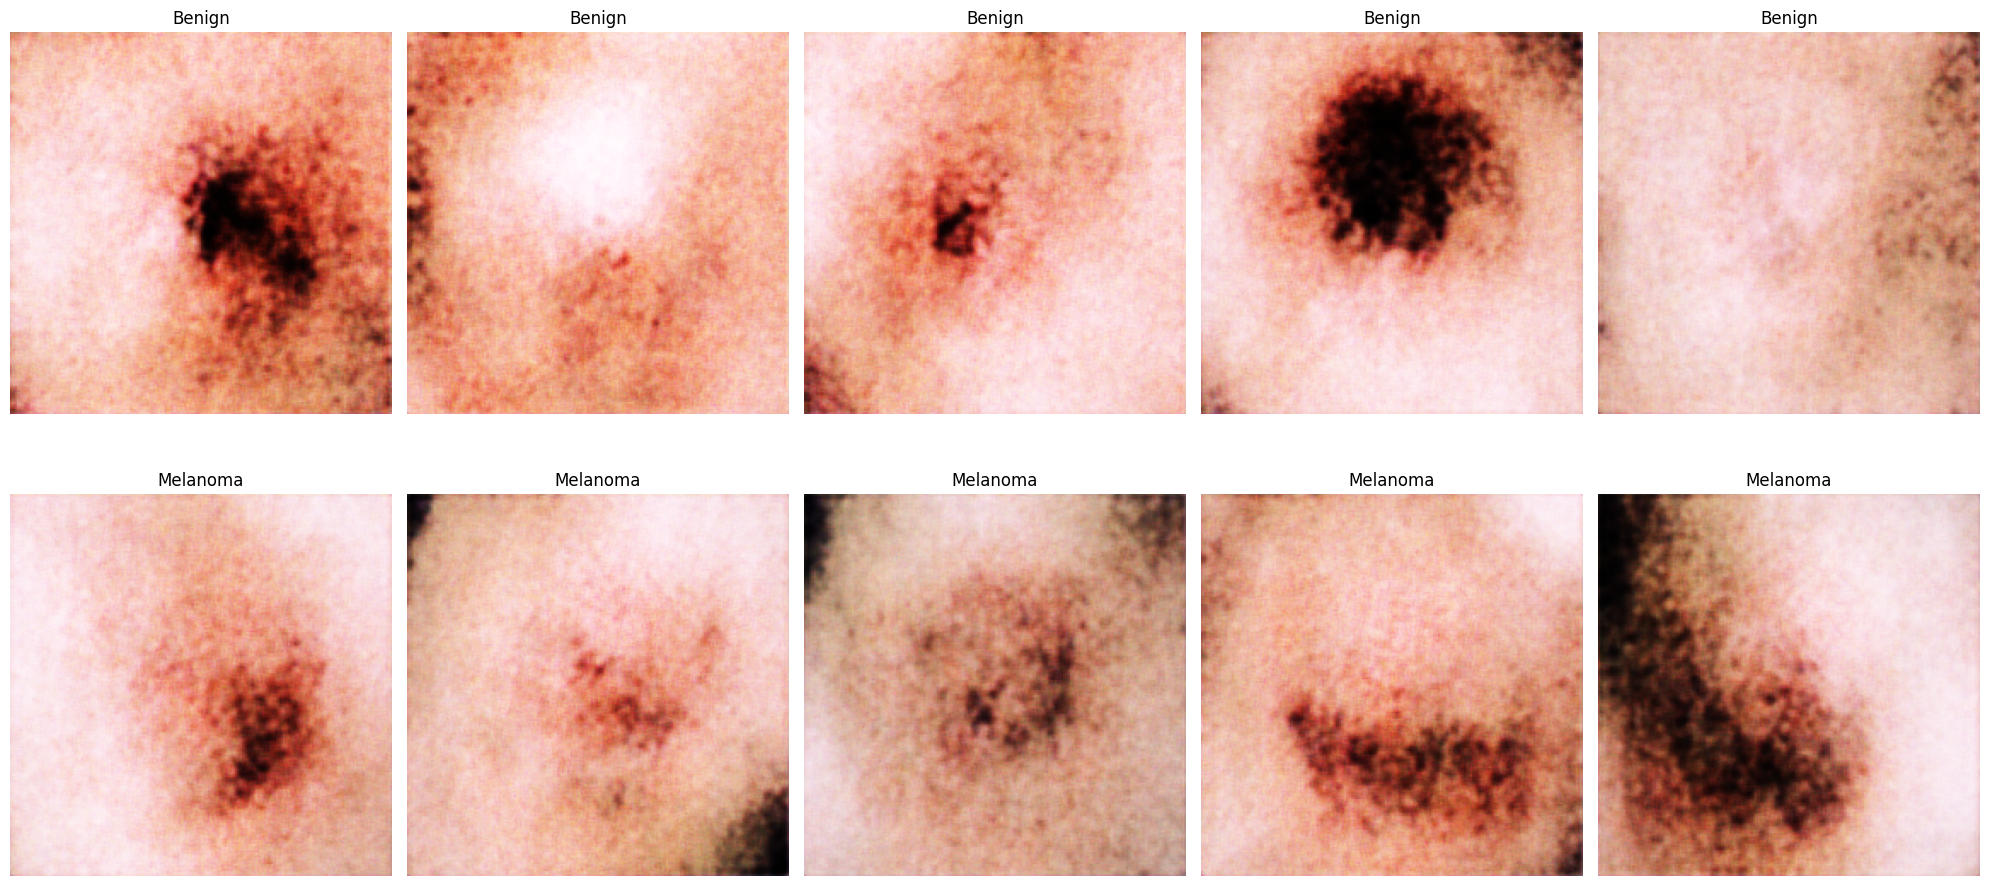

In [ ]:
# List the first 2 subfolders in the image_folder
subfolders = list_subfolders(image_folder)

# Display images
num_images_to_show = 5

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

for i, subfolder in enumerate(subfolders[:2]): # Limit to first 2 subfolders
    class_name = os.path.basename(subfolder)
    image_files = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for j, image_file in enumerate(image_files[:num_images_to_show]):
        image_path = os.path.join(subfolder, image_file)
        try:
            img = Image.open(image_path)
            plt.subplot(2, num_images_to_show, i * num_images_to_show + j + 1)
            plt.imshow(img)
            plt.title(f"{class_name}") # Added Class Name to title
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
plt.tight_layout()
plt.show()

In [ ]:
output_csv = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_icic.csv' #ETa akhono amra generate korini ezonno not found dekhabe

In [ ]:
import pandas as pd
try:
  df = pd.read_csv(output_csv)
  print(df)
except FileNotFoundError:
  print(f"The file '{output_csv}' was not found.")


The file '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv' was not found.


In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images'
output_csv = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv'

In [ ]:
import os

image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic'

for subdir, dirs, files in os.walk(image_folder):
    if subdir != image_folder:  # Skip the main folder itself
      image_count = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
      print(f"Folder: {subdir}, Number of images: {image_count}")

Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic/Benign, Number of images: 6705
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images_isic/Melanoma, Number of images: 6705


In [ ]:
def image_to_pixels(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = np.array(img)
    if img.shape == (28, 28, 3):
        img_flatten = img.flatten()
        return img_flatten
    else:
        return None

In [ ]:
data = []
for label_name, label_num in label_mapping.items():
    folder_path = os.path.join(image_folder, label_name)

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        pixels = image_to_pixels(file_path)
        if pixels is not None:
            data.append(list(pixels) + [label_num])

In [ ]:
pixel_columns = [f'pixel{str(i).zfill(4)}' for i in range(28*28*3)]
df = pd.DataFrame(data, columns=pixel_columns + ['label'])

In [ ]:
df

In [ ]:
df.to_csv(output_csv, index=False)

In [ ]:
df["label"].value_counts()

label
0    6705
1    6705
Name: count, dtype: int64

In [ ]:
difference = 134

if difference > 0:
    # Get the number of rows where label is 2
    num_label_2 = len(df[df['label'] == 2])

    # Sample a maximum of num_label_2 rows
    sample_size = min(difference, num_label_2)

    # Randomly sample 'sample_size' rows where label is 2
    drop_indices = df[df['label'] == 2].sample(n=sample_size, random_state=42).index

    # Drop these indices from the DataFrame
    df = df.drop(drop_indices)

# Verify the new value counts
print(df['label'].value_counts())

label
0    6705
1    6705
Name: count, dtype: int64


In [ ]:
df.to_csv(output_csv, index=False)

# Hybrid

**Using the Previous Model**

In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax, Adagrad, RMSprop, Adadelta, Nadam, Ftrl, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import register_keras_serializable


In [ ]:
train_data_path = '/content/drive/MyDrive/Skin HAM10000/Latest/train_images_pixel_values.csv'  # Update this path
validation_data_path = '/content/drive/MyDrive/Skin HAM10000/Latest/merge_images_pixel_values.csv'  # Update this path
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_icic.csv'  # Update this path



In [ ]:
# Load datasets
train_df = pd.read_csv(train_data_path)
validation_df = pd.read_csv(validation_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([train_df, validation_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]

In [ ]:
# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
y = to_categorical(Label_encoded, num_classes=2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=42, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('Benign'),
    1: ('Melanoma')
}

Training set shape: (15666, 28, 28, 3), Training labels shape: (15666, 2)
Testing set shape: (5222, 28, 28, 3), Testing labels shape: (5222, 2)


In [ ]:
import numpy as np

# Assuming y_train and y_test are one-hot encoded
def count_images_per_class(y_data):
    class_counts = np.sum(y_data, axis=0)
    return class_counts

# Count images per class for training set
train_class_counts = count_images_per_class(y_train)
print("Number of images per class in training set:")
for class_index, count in enumerate(train_class_counts):
    print(f"Class {class_index}: {int(count)}")

# Count images per class for testing set
test_class_counts = count_images_per_class(y_test)
print("\nNumber of images per class in testing set:")
for class_index, count in enumerate(test_class_counts):
    print(f"Class {class_index}: {int(count)}")

Number of images per class in training set:
Class 0: 7609
Class 1: 8057

Number of images per class in testing set:
Class 0: 2536
Class 1: 2686


In [ ]:
pip install tensorflow keras numpy pandas matplotlib scikit-learn joblib


In [ ]:
@register_keras_serializable()
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        # ----- Residual Connection -----
        output = Add()([spatial_attention, inputs])

        return output

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config


In [ ]:
# Define the input shape and number of classes
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Input Layer
inputs = Input(shape=input_shape, name='input_layer')

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_1')(inputs)
x = MaxPooling2D(name='max_pooling2d_1')(x)
x = BatchNormalization(name='batch_normalization_1')(x)

# Convolutional Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_2')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_3')(x)
x = MaxPooling2D(name='max_pooling2d_2')(x)
x = BatchNormalization(name='batch_normalization_2')(x)

# Convolutional Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_4')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_5')(x)
x = MaxPooling2D(name='max_pooling2d_3')(x)
x = BatchNormalization(name='batch_normalization_3')(x)

# Convolutional Block 4
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_6')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_7')(x)
x = MaxPooling2D(name='max_pooling2d_4')(x)

# Integrate CBAM after the last convolutional block
x = CBAM(name='cbam_1')(x)

# Flatten and Dense Layers
x = Flatten(name='flatten_1')(x)
x = Dropout(rate=0.2, name='dropout_1')(x)
x = Dense(units=256, activation='relu',
          kernel_initializer='he_normal', name='dense_1')(x)
x = BatchNormalization(name='batch_normalization_4')(x)

x = Dense(units=128, activation='relu',
          kernel_initializer='he_normal', name='dense_2')(x)
x = BatchNormalization(name='batch_normalization_5')(x)

x = Dense(units=64, activation='relu',
          kernel_initializer='he_normal', name='dense_3')(x)
x = BatchNormalization(name='batch_normalization_6')(x)

x = Dense(units=32, activation='relu',
          kernel_initializer='he_normal',
          kernel_regularizer=L1L2(), name='dense_4')(x)
x = BatchNormalization(name='batch_normalization_7')(x)

# Output Layer
outputs = Dense(units=num_classes, activation='softmax',
               kernel_initializer='glorot_uniform', name='classifier')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs, name='CBAM_Functional_Model')

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "CBAM_Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam_1 (CBAM)                        │ (None, 1, 1, 256)           │           8,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,0

 Total params: 1,283,476 (4.90 MB)

 Trainable params: 1,282,068 (4.89 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# Define callbacks for model checkpointing, learning rate reduction, and TensorBoard
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=0.0001,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks (EarlyStopping removed)
callbacks = [checkpoint, reduce_lr, tensorboard]

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=100,  # Adjust the number of epochs as needed
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
486/490 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6975 - loss: 0.6022
Epoch 1: val_accuracy improved from -inf to 0.80755, saving model to /content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras
490/490 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6979 - loss: 0.6014 - val_accuracy: 0.8075 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8096 - loss: 0.3945
Epoch 2: val_accuracy improved from 0.80755 to 0.81865, saving model to /content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8096 - loss: 0.3945 - val_accuracy: 0.8187 - val_loss: 0.3548 - learning_rate: 0.0010
Epoch 3/100
486/490 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8267 - loss: 0.3411
Epoch 3: val_accuracy improved from 0.81865 to 0.86672, saving model to /content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras
490/490 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic_cbam.keras')
print("Model saved successfully.")


Model saved successfully.


In [ ]:
# prompt: write to plot accuracy and loss for model

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Evaluate the model on the training and testing sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}")

Training accuracy: 0.9769, Training loss: 0.0466
Testing accuracy: 0.9563, Testing loss: 0.1003


In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    jaccard_score, confusion_matrix
)

# Load the saved model
model = load_model('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic_cbam.keras')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
jaccard = jaccard_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Jaccard Score: {jaccard}")
print("Confusion Matrix:")
conf_matrix


164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Test Loss: 0.10034468024969101
Test Accuracy: 0.9563385844230652
Precision: 0.9564171205745217
Recall: 0.9563385675986212
F1-Score: 0.9563271143431218
Cohen's Kappa: 0.9125684440505777
Matthews Correlation Coefficient: 0.9126653473436155
Jaccard Score: 0.9163135996179559
Confusion Matrix:


array([[2403,  133],
       [  95, 2591]])

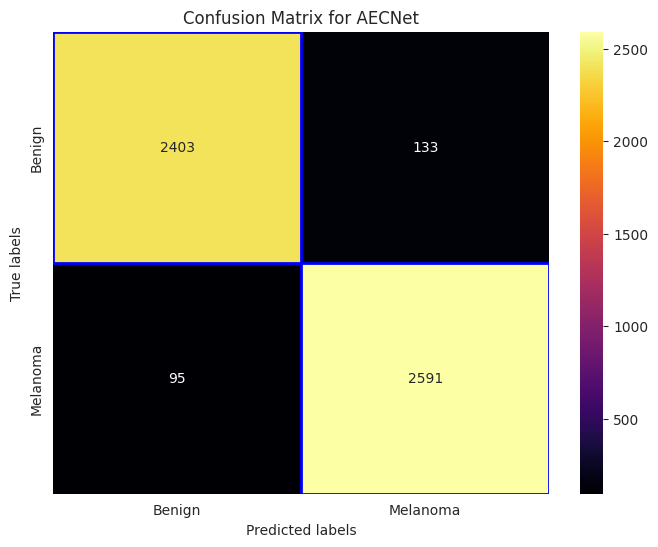

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')  # Use 'Blues' colormap

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for AECNet')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i] for i in range(len(classes))]) # Fixed: Use classes[i] to get the labels
ax.yaxis.set_ticklabels([classes[i] for i in range(len(classes))]) # Fixed: Use classes[i] to get the labels

# Highlight specific classes (Modified for clarity and to handle potential errors)
for class_index in classes:
    try:
        # Add a rectangle patch to highlight the cell
        ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))
    except ValueError:
        print(f"Warning: Class index {class_index} not found in confusion matrix. Skipping highlight.")

plt.show()

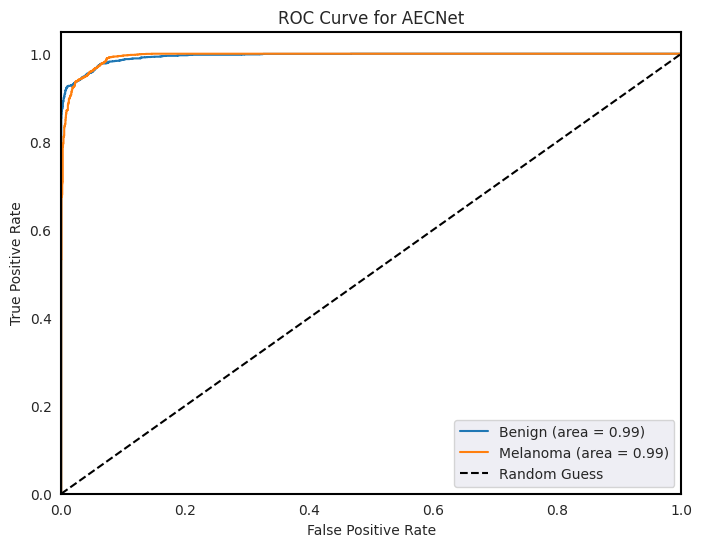

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)  # Use the length of your classes dictionary
# Iterate through class names instead of indices
for class_index in classes.keys():  # Changed to classes.keys() to get indices
    fpr[class_index], tpr[class_index], _ = roc_curve(y_test[:, class_index], y_pred[:, class_index])
    roc_auc[class_index] = auc(fpr[class_index], tpr[class_index])

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

# Add diagonal line
ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Customize axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for AECNet')
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.6)  # Optional: Add a subtle grid

plt.show()


In [ ]:
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras'  # Update this path as needed


In [ ]:
# Load the best saved model with custom_objects
loaded_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)
print("Model loaded successfully.")

# Evaluate on training data
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")

print('-' * 30)

# Evaluate on testing data
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# Initialize the loaded model by passing real data
real_data_batch = X_train[:10]  # Using the first 10 samples from training data
_ = loaded_model.predict(real_data_batch, verbose=1)
print("Model initialized with a real input batch.")


Model loaded successfully.
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9761 - loss: 0.0475
Train Loss: 0.0468
Train Accuracy: 97.67%
------------------------------
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9529 - loss: 0.1135
Test Loss: 0.0982
Test Accuracy: 95.90%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model initialized with a real input batch.


In [ ]:
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic.keras'  # Update this path as needed


In [ ]:
# Load the best saved model with custom_objects
loaded_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)
print("Model loaded successfully.")
# Verify layer names to ensure correct selection for feature extraction
for layer in loaded_model.layers:
    print(layer.name)

# Create the feature extraction model up to 'flatten_1' layer
feature_extraction_layer = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('flatten_1').output)
print("Feature extraction model created successfully.")


Model loaded successfully.
input_layer
conv2d_1
max_pooling2d_1
batch_normalization_1
conv2d_2
conv2d_3
max_pooling2d_2
batch_normalization_2
conv2d_4
conv2d_5
max_pooling2d_3
batch_normalization_3
conv2d_6
conv2d_7
max_pooling2d_4
cbam_1
flatten_1
dropout_1
dense_1
batch_normalization_4
dense_2
batch_normalization_5
dense_3
batch_normalization_6
dense_4
batch_normalization_7
classifier
Feature extraction model created successfully.


In [ ]:
print("Extracting features from training data...")
X_train_features = feature_extraction_layer.predict(X_train, verbose=1)
print("Extracting features from testing data...")
X_test_features = feature_extraction_layer.predict(X_test, verbose=1)

# Print feature shapes to verify
print(f"Shape of extracted training features: {X_train_features.shape}")
print(f"Shape of extracted testing features: {X_test_features.shape}")


Extracting features from training data...
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Extracting features from testing data...
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of extracted training features: (15666, 256)
Shape of extracted testing features: (5222, 256)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np

# Assuming X_train_features, X_test_features, y_train, and y_test are already defined
# and y_train and y_test are one-hot encoded

# Convert one-hot encoded labels back to integer labels for Random Forest
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_features, y_train_int)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_features)

# Calculate metrics
accuracy = accuracy_score(y_test_int, y_pred)
precision = precision_score(y_test_int, y_pred, average=None) # Calculate precision per class
recall = recall_score(y_test_int, y_pred, average=None) # Calculate recall per class
f1 = f1_score(y_test_int, y_pred, average=None) # Calculate f1 per class
loss = log_loss(y_test, rf_classifier.predict_proba(X_test_features))


print(f"Accuracy: {accuracy}")
print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"F1-score per class: {f1}")
print(f"Loss: {loss}")

Accuracy: 0.9582535427039448
Precision per class: [0.95846519 0.95805494]
Recall per class: [0.95544164 0.96090841]
F1-score per class: [0.95695103 0.95947955]
Loss: 0.11588755526230106


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training features
print("Training Random Forest classifier...")
rf_classifier.fit(X_train_features, y_train_int)
print("Random Forest classifier trained successfully.")

# Make predictions on the test set
print("Making predictions with Random Forest classifier...")
y_pred_rf = rf_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_int, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf*100:.2f}%")

# Generate classification report
report_rf = classification_report(
    y_test_int, y_pred_rf,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("Random Forest Classification Report:\n", report_rf)


Training Random Forest classifier...
Random Forest classifier trained successfully.
Making predictions with Random Forest classifier...
Random Forest Classifier Accuracy: 95.84%
Random Forest Classification Report:
               precision    recall  f1-score   support

           e       0.96      0.96      0.96      2536
           e       0.96      0.96      0.96      2686

    accuracy                           0.96      5222
   macro avg       0.96      0.96      0.96      5222
weighted avg       0.96      0.96      0.96      5222



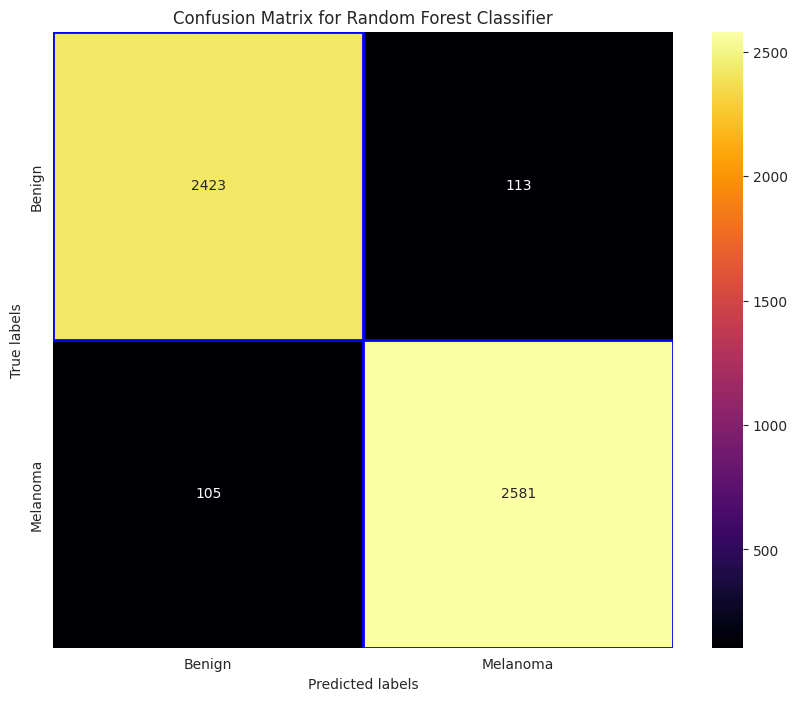

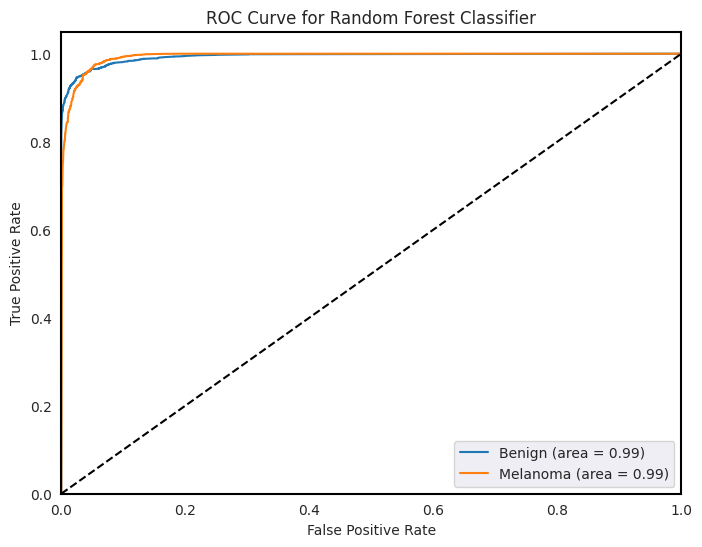

Training Loss: 0.0210
Testing Loss: 0.1159
Kappa: 0.9164
MCC: 0.9164
Jaccard: 0.9199


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')  # Use 'Blues' colormap

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Classifier')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i] for i in sorted(classes)])


for class_index in classes:
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()


# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use the probability estimates for the ROC curve
y_prob_rf = rf_classifier.predict_proba(X_test_features)


for i in range(len(classes)):  # Iterate through class indices
    fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_rf[:, i], pos_label=i) # pos_label crucial here
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

# Add diagonal line
ax.plot([0, 1], [0, 1], 'k--')

# Customize axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Random Forest Classifier')
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.6)  # Optional: Add a subtle grid

plt.show()

kappa = cohen_kappa_score(y_true_classes, y_pred)
mcc = matthews_corrcoef(y_true_classes, y_pred)
jaccard = jaccard_score(y_true_classes, y_pred, average='weighted')
# Print Metrics
train_loss = log_loss(y_train, rf_classifier.predict_proba(X_train_features))
test_loss = log_loss(y_test, rf_classifier.predict_proba(X_test_features))
print(f"Training Loss: {train_loss:.4f}") # Assuming train_loss is defined
print(f"Testing Loss: {test_loss:.4f}") # Assuming test_loss is defined
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")

# **Different machine learning models**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Assuming X_train_features, X_test_features, y_train, y_test are defined from previous code
# Convert one-hot encoded labels back to integer labels for SVC
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Initialize and train the SVC classifier
svc_classifier = SVC(probability=True) # Enable probability estimates for log_loss
svc_classifier.fit(X_train_features, y_train_int)

# Predict on the test set
y_pred_svc = svc_classifier.predict(X_test_features)
y_prob_svc = svc_classifier.predict_proba(X_test_features)

# Calculate metrics
accuracy_svc = accuracy_score(y_test_int, y_pred_svc)
precision_svc = precision_score(y_test_int, y_pred_svc, average=None) # Calculate per class
recall_svc = recall_score(y_test_int, y_pred_svc, average=None) # Calculate per class
f1_svc = f1_score(y_test_int, y_pred_svc, average=None) # Calculate per class
loss_svc = log_loss(y_test, y_prob_svc) # Calculate log loss

print("SVC Metrics (per class):")
print(f"Accuracy: {accuracy_svc:.6f}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-Score: {f1_svc}")
print(f"Log Loss: {loss_svc:.4f}")

SVC Metrics (per class):
Accuracy: 0.959020
Precision: [0.96108022 0.95710059]
Recall: [0.95425868 0.96351452]
F1-Score: [0.9576573  0.96029685]
Log Loss: 0.1307


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
# ... (your existing code)

# Define base estimators (replace with your trained models)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True)) #probability=True is important for log_loss
    # Add other base estimators here...
]

# Define the meta-learner (SVC in this case)
meta_learner = SVC(probability=True)

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=meta_learner
)

# Fit the stacking classifier on the training data
print("Training Stacking Classifier...")
stacking_classifier.fit(X_train_features, y_train_int)
print("Stacking Classifier trained successfully.")


# Predict on the test set
y_pred_stacking = stacking_classifier.predict(X_test_features)
y_prob_stacking = stacking_classifier.predict_proba(X_test_features)


# Calculate metrics
accuracy_stacking = accuracy_score(y_test_int, y_pred_stacking)
precision_stacking = precision_score(y_test_int, y_pred_stacking, average=None)
recall_stacking = recall_score(y_test_int, y_pred_stacking, average=None)
f1_stacking = f1_score(y_test_int, y_pred_stacking, average=None)
loss_stacking = log_loss(y_test, y_prob_stacking)

print("Stacking Classifier Metrics (per class):")
print(f"Accuracy: {accuracy_stacking:.6f}")
print(f"Precision: {precision_stacking}")
print(f"Recall: {recall_stacking}")
print(f"F1-Score: {f1_stacking}")
print(f"Log Loss: {loss_stacking:.4f}")

Training Stacking Classifier...
Stacking Classifier trained successfully.
Stacking Classifier Metrics (per class):
Accuracy: 0.958828
Precision: [0.95779093 0.95980648]
Recall: [0.95741325 0.96016381]
F1-Score: [0.95760205 0.95998511]
Log Loss: 0.1616


In [ ]:
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_classifier = SVC(kernel='linear', C=1, probability=True, random_state=42) # You can adjust the kernel and other parameters

# Train the classifier on the training features
print("Training SVC classifier...")
svc_classifier.fit(X_train_features, y_train_int)
print("SVC classifier trained successfully.")

# Make predictions on the test set
print("Making predictions with SVC classifier...")
y_pred_svc = svc_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test_int, y_pred_svc)
print(f"SVC Classifier Accuracy: {accuracy_svc*100:.2f}%")

# Generate classification report
report_svc = classification_report(
    y_test_int, y_pred_svc,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("SVC Classification Report:\n", report_svc)



Training SVC classifier...
SVC classifier trained successfully.
Making predictions with SVC classifier...
SVC Classifier Accuracy: 95.48%
SVC Classification Report:
               precision    recall  f1-score   support

           e       0.96      0.95      0.95      2536
           e       0.95      0.96      0.96      2686

    accuracy                           0.95      5222
   macro avg       0.95      0.95      0.95      5222
weighted avg       0.95      0.95      0.95      5222



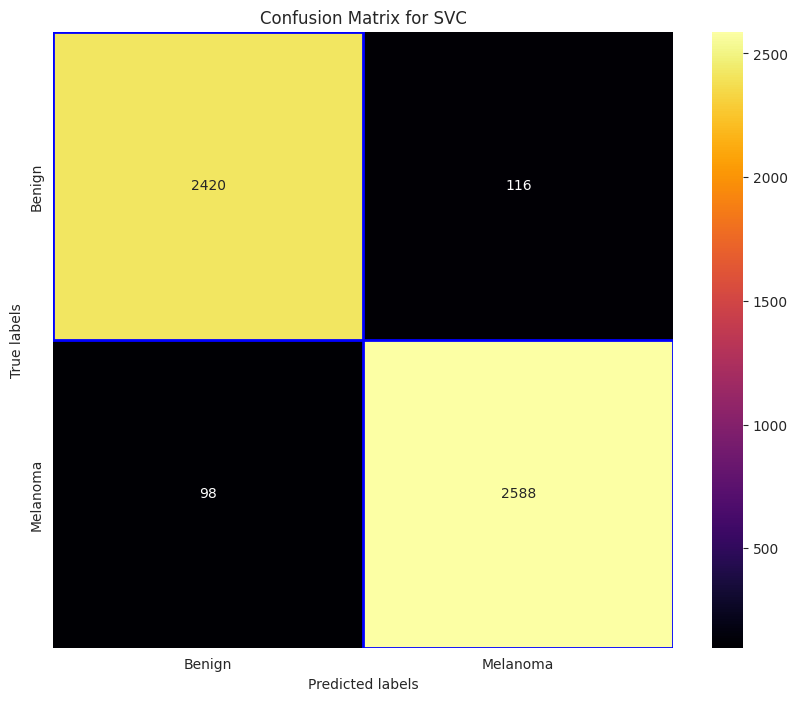

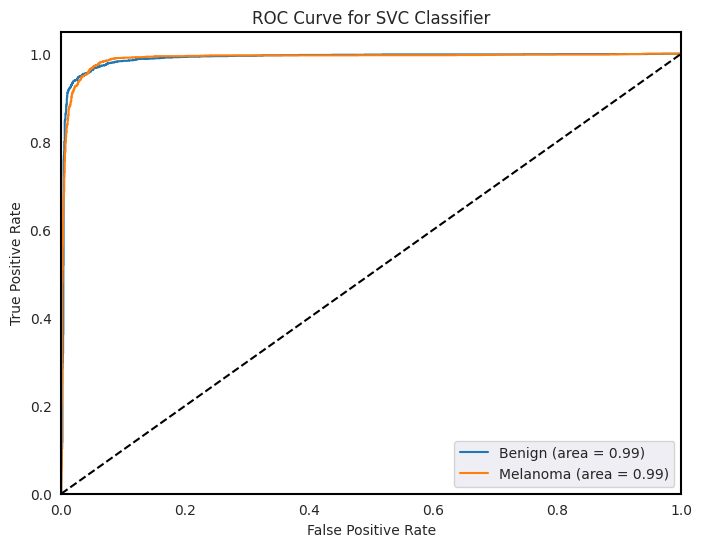

Kappa: 0.9180
MCC: 0.9180
Jaccard: 0.9213


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred_svc)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')  # Use 'Blues' colormap

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for SVC')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i] for i in sorted(classes)])

for class_index in classes:
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()


# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use the probability estimates for the ROC curve
y_prob_svc = svc_classifier.predict_proba(X_test_features)


for i in range(len(classes)):  # Iterate through class indices
    fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_svc[:, i], pos_label=i)  # pos_label crucial here
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Classifier')
plt.legend(loc="lower right")
plt.show()

kappa = cohen_kappa_score(y_test_int, y_pred_svc)
mcc = matthews_corrcoef(y_test_int, y_pred_svc)
jaccard = jaccard_score(y_test_int, y_pred_svc, average='weighted')
# Print Metrics
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")


In [ ]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, jaccard_score


kappa = cohen_kappa_score(y_true_classes, y_pred_svc)
mcc = matthews_corrcoef(y_true_classes, y_pred_svc)
jaccard = jaccard_score(y_true_classes, y_pred_svc, average='weighted')  # Use 'weighted' for multi-class

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")

# Assuming test_loss is defined from previous code (e.g., from model.evaluate)
print(f"Testing Loss: {test_loss}")

Kappa: 0.9179551229849409
MCC: 0.9179769818378027
Jaccard: 0.9212603257527029
Testing Loss: 0.12249230427816482


In [ ]:
# prompt: code for logistic regression with accuracy, precision, recall, f1-score, loss in floating value not use average='weighted' and single value not per class

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Assuming X_train_features, X_test_features, y_train_int, y_test_int are defined

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
logreg_classifier.fit(X_train_features, y_train_int)


# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test_features)

# Predict probabilities for log_loss
y_prob_logreg = logreg_classifier.predict_proba(X_test_features)

# Calculate metrics
accuracy_logreg = accuracy_score(y_test_int, y_pred_logreg)
precision_logreg = precision_score(y_test_int, y_pred_logreg, average=None)
recall_logreg = recall_score(y_test_int, y_pred_logreg, average=None)
f1_logreg = f1_score(y_test_int, y_pred_logreg, average=None)
loss_logreg = log_loss(y_test_int, y_prob_logreg) # Use y_test_int for log_loss

print("Logistic Regression Metrics (per class):")
print(f"Accuracy: {accuracy_logreg:.6f}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-Score: {f1_logreg}")
print(f"Log Loss: {loss_logreg:.4f}")

Logistic Regression Metrics (per class):
Accuracy: 0.954424
Precision: [0.95704057 0.95199409]
Recall: [0.94873817 0.95979151]
F1-Score: [0.95287129 0.9558769 ]
Log Loss: 0.1145


Training Logistic Regression classifier...
Logistic Regression classifier trained successfully.
Making predictions with Logistic Regression classifier...
Logistic Regression Classifier Accuracy: 95.50%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           e       0.96      0.95      0.95      2536
           e       0.95      0.96      0.96      2686

    accuracy                           0.95      5222
   macro avg       0.96      0.95      0.95      5222
weighted avg       0.96      0.95      0.95      5222

Confusion matrix, without normalization
[[2408  128]
 [ 107 2579]]


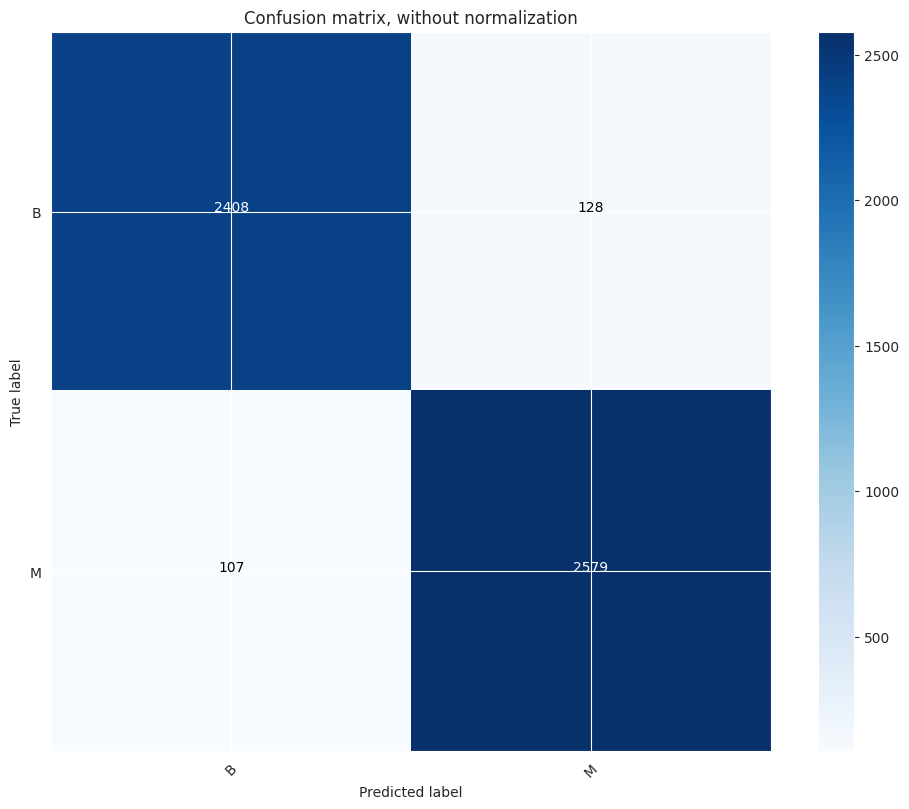

Kappa: 0.9099010135062211
MCC: 0.9099305071170198
Jaccard: 0.9138650364145378


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef, jaccard_score
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Assuming X_train_features, y_train_int, X_test_features, y_test_int, and classes are defined from previous code

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Train the classifier on the training features
print("Training Logistic Regression classifier...")
lr_classifier.fit(X_train_features, y_train_int)
print("Logistic Regression classifier trained successfully.")


# Make predictions on the test set
print("Making predictions with Logistic Regression classifier...")
y_pred_lr = lr_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_int, y_pred_lr)
print(f"Logistic Regression Classifier Accuracy: {accuracy_lr*100:.2f}%")

# Generate classification report
report_lr = classification_report(
    y_test_int, y_pred_lr,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("Logistic Regression Classification Report:\n", report_lr)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred_lr)
class_names = [classes[i][0] for i in sorted(classes)]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

kappa = cohen_kappa_score(y_test_int, y_pred_lr)
mcc = matthews_corrcoef(y_test_int, y_pred_lr)
jaccard = jaccard_score(y_test_int, y_pred_lr, average='weighted')

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")

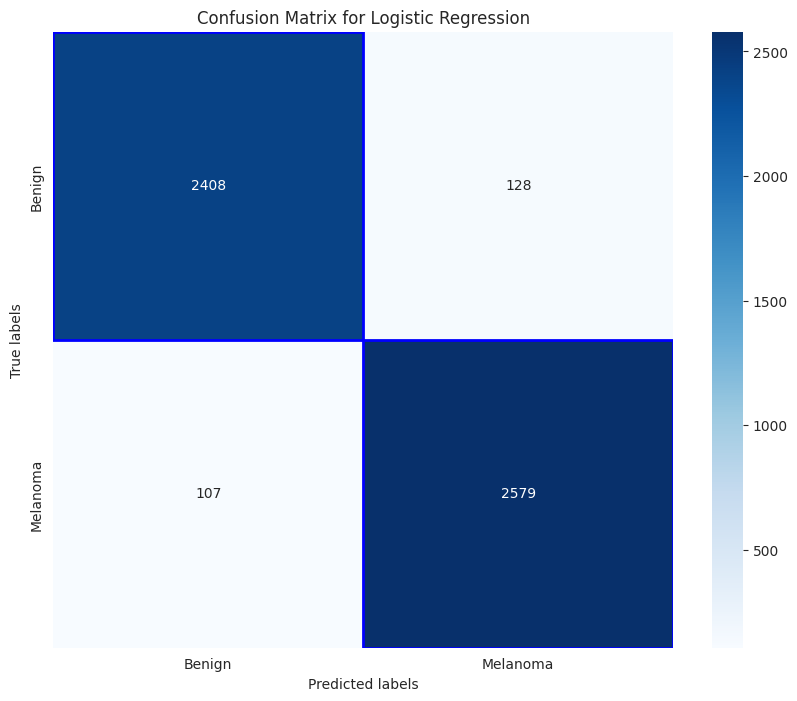

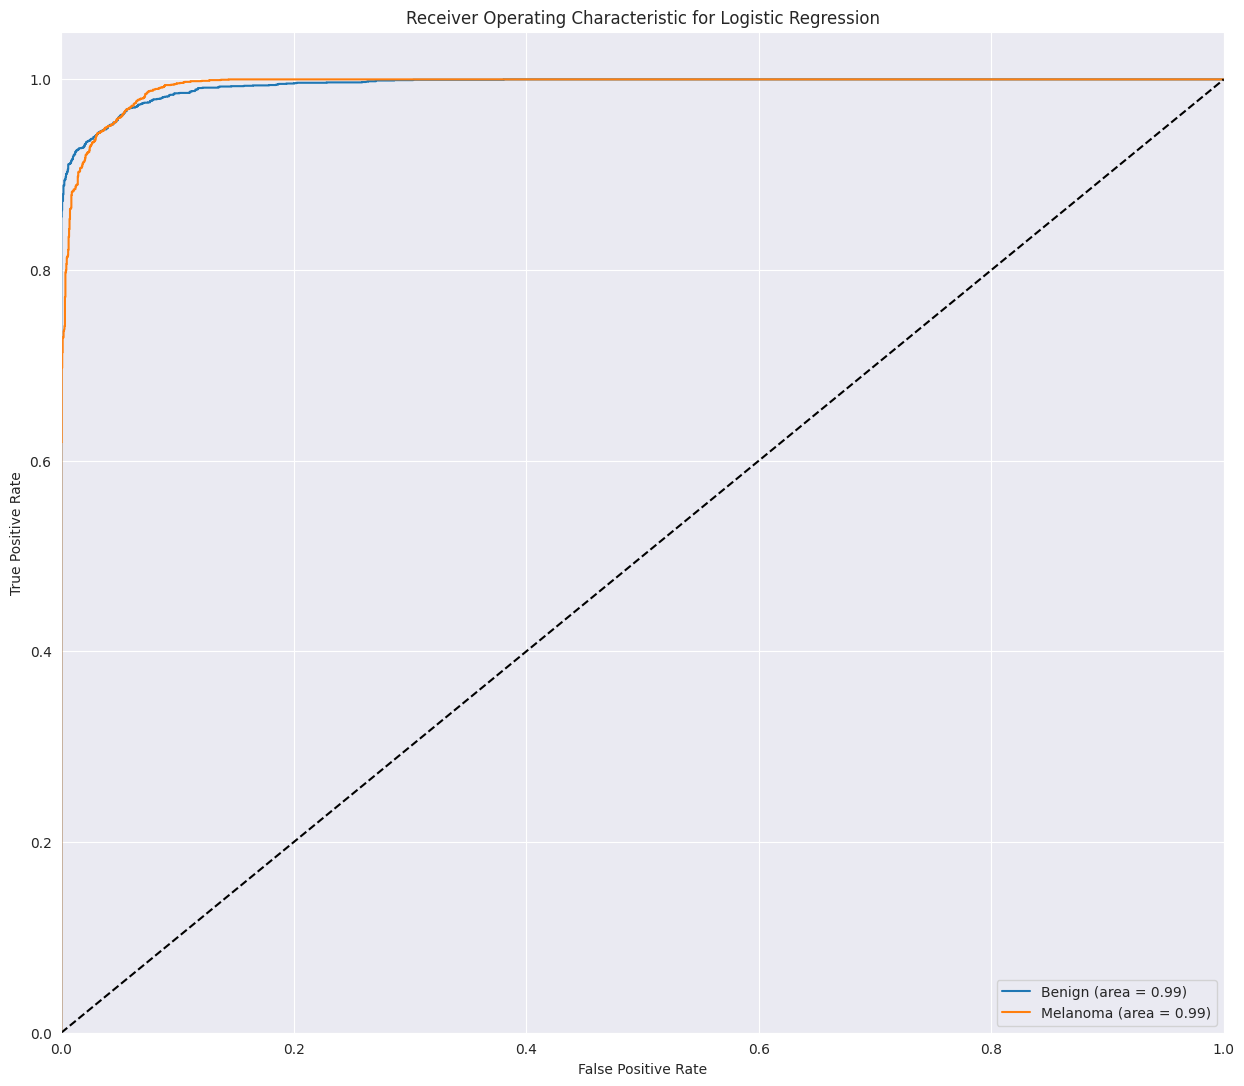

Kappa: 0.9099
MCC: 0.9099
Jaccard: 0.9139
Testing Loss: 0.1003


In [ ]:
from sklearn.metrics import roc_curve, auc, cohen_kappa_score, matthews_corrcoef, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred_lr)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')  # Use 'Blues' colormap

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i] for i in sorted(classes)])

for class_index in classes:
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use the probability estimates for the ROC curve
y_prob_lr = lr_classifier.predict_proba(X_test_features)


for i in range(len(classes)):  # Iterate through class indices
    fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_lr[:, i], pos_label=i)  # pos_label crucial here
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(15, 13))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

kappa = cohen_kappa_score(y_test_int, y_pred_lr)
mcc = matthews_corrcoef(y_test_int, y_pred_lr)
jaccard = jaccard_score(y_test_int, y_pred_lr, average='weighted')
# Print Metrics
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")
print(f"Testing Loss: {test_loss:.4f}") # Assuming test_loss is defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Assuming X_train_features, X_test_features, y_train_int, y_test, and y_test_int are defined

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2) # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train_features, y_train_int)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_features)
y_prob_knn = knn_classifier.predict_proba(X_test_features)

# Calculate metrics
accuracy_knn = accuracy_score(y_test_int, y_pred_knn)
precision_knn = precision_score(y_test_int, y_pred_knn, average=None)
recall_knn = recall_score(y_test_int, y_pred_knn, average=None)
f1_knn = f1_score(y_test_int, y_pred_knn, average=None)
loss_knn = log_loss(y_test, y_prob_knn)


print("KNN Metrics (per class):")
print(f"Accuracy: {accuracy_knn:.6f}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}")
print(f"Log Loss: {loss_knn:.4f}")

KNN Metrics (per class):
Accuracy: 0.958828
Precision: [0.94378585 0.97391638]
Recall: [0.97318612 0.94527178]
F1-Score: [0.95826053 0.95938031]
Log Loss: 0.7607


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_features, y_train_int, X_test_features, y_test_int are defined from previous code

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
print("Training KNN classifier...")
knn_classifier.fit(X_train_features, y_train_int)
print("KNN classifier trained successfully.")

# Make predictions
print("Making predictions with KNN classifier...")
y_pred_knn = knn_classifier.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test_int, y_pred_knn)
print(f"KNN Accuracy: {accuracy}")

# Generate classification report
print(classification_report(y_test_int, y_pred_knn, target_names=[classes[i][1] for i in sorted(classes)]))

Training KNN classifier...
KNN classifier trained successfully.
Making predictions with KNN classifier...
KNN Accuracy: 0.9565300651091536
              precision    recall  f1-score   support

           e       0.96      0.95      0.96      2536
           e       0.95      0.96      0.96      2686

    accuracy                           0.96      5222
   macro avg       0.96      0.96      0.96      5222
weighted avg       0.96      0.96      0.96      5222



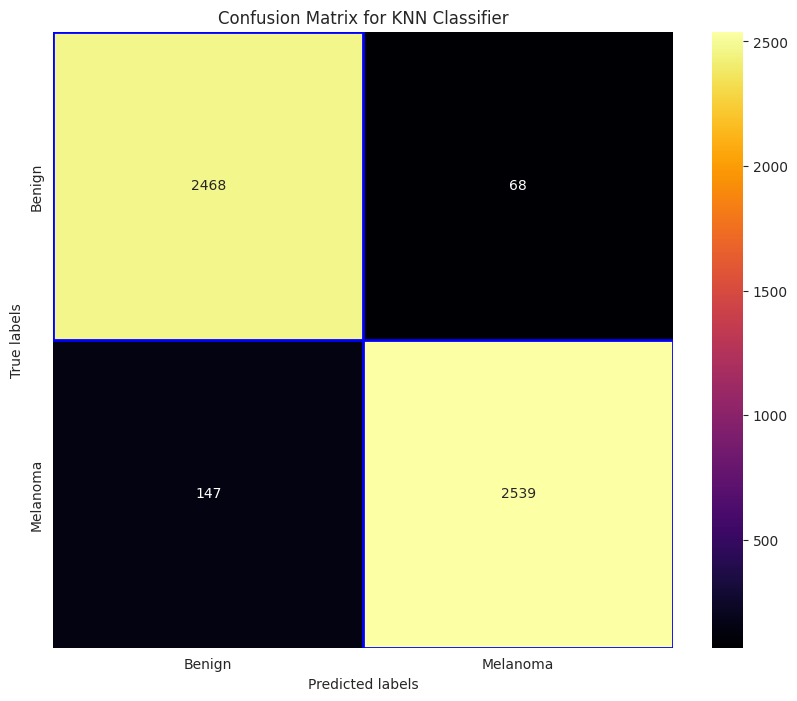

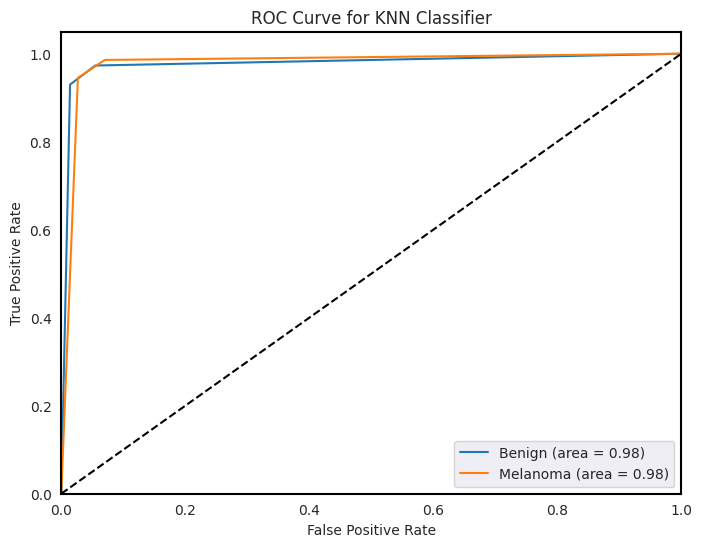

Kappa: 0.9177
MCC: 0.9181
Jaccard: 0.9209
Testing Loss: 0.1225


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred_knn)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN Classifier')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i] for i in sorted(classes)])

# Highlight diagonal
for class_index in classes:
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

# Calculate ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your knn_classifier has a predict_proba method
try:
    y_prob_knn = knn_classifier.predict_proba(X_test_features)
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_knn[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
except AttributeError:
    print("Warning: predict_proba not available for KNN. Cannot compute ROC curve and AUC.")
    y_prob_knn = None


# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()


# Calculate kappa, MCC, Jaccard
kappa = cohen_kappa_score(y_test_int, y_pred_knn)
mcc = matthews_corrcoef(y_test_int, y_pred_knn)
jaccard = jaccard_score(y_test_int, y_pred_knn, average='weighted')

# Print metrics
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")
print(f"Testing Loss: {test_loss:.4f}") # Assuming test_loss is defined

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_features, y_train_int, X_test_features, y_test_int, and classes are defined from previous code

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(classes), random_state=42)

# Train the classifier
print("Training XGBoost classifier...")
xgb_classifier.fit(X_train_features, y_train_int)
print("XGBoost classifier trained successfully.")

# Make predictions
print("Making predictions with XGBoost classifier...")
y_pred_xgb = xgb_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_int, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb*100:.2f}%")
# Calculate metrics
accuracy_xgb = accuracy_score(y_test_int, y_pred_xgb)
precision_xgb = precision_score(y_test_int, y_pred_xgb, average=None)
recall_xgb = recall_score(y_test_int, y_pred_xgb, average=None)
f1_xgb = f1_score(y_test_int, y_pred_xgb, average=None)
loss_xgb = log_loss(y_test_int, y_prob_xgb) #Use y_test_int for log_loss

print("XGBoost Metrics (per class):")
print(f"Accuracy: {accuracy_xgb:.6f}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-Score: {f1_xgb}")
print(f"Log Loss: {loss_xgb:.4f}")

# Generate classification report
report_xgb = classification_report(
    y_test_int, y_pred_xgb,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("XGBoost Classification Report:\n", report_xgb)

Training XGBoost classifier...
XGBoost classifier trained successfully.
Making predictions with XGBoost classifier...
XGBoost Classifier Accuracy: 95.77%
XGBoost Metrics (per class):
Accuracy: 0.957679
Precision: [0.95950774 0.95597484]
Recall: [0.95307571 0.96202532]
F1-Score: [0.95628091 0.95899054]
Log Loss: 0.1736
XGBoost Classification Report:
               precision    recall  f1-score   support

           e       0.96      0.95      0.96      2536
           e       0.96      0.96      0.96      2686

    accuracy                           0.96      5222
   macro avg       0.96      0.96      0.96      5222
weighted avg       0.96      0.96      0.96      5222



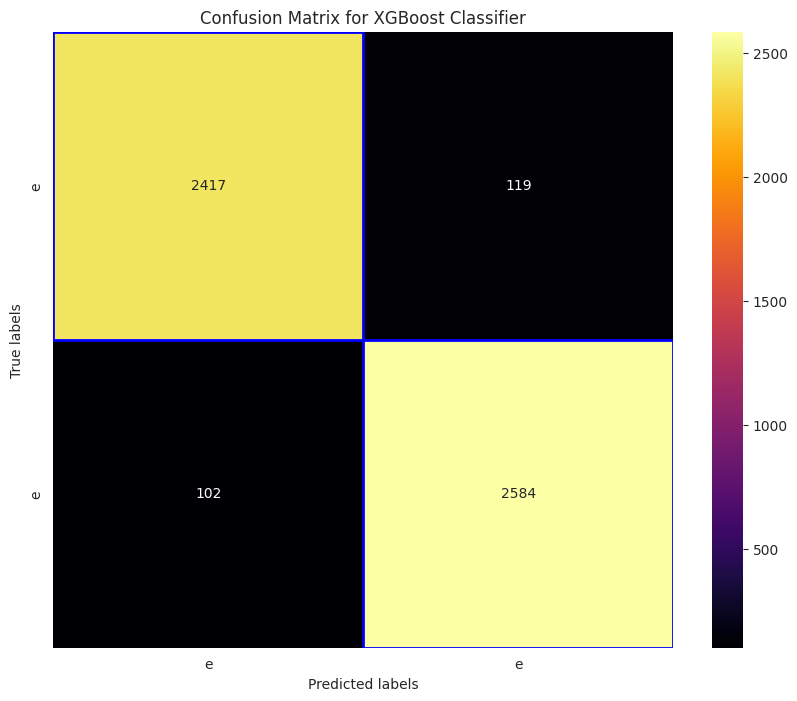

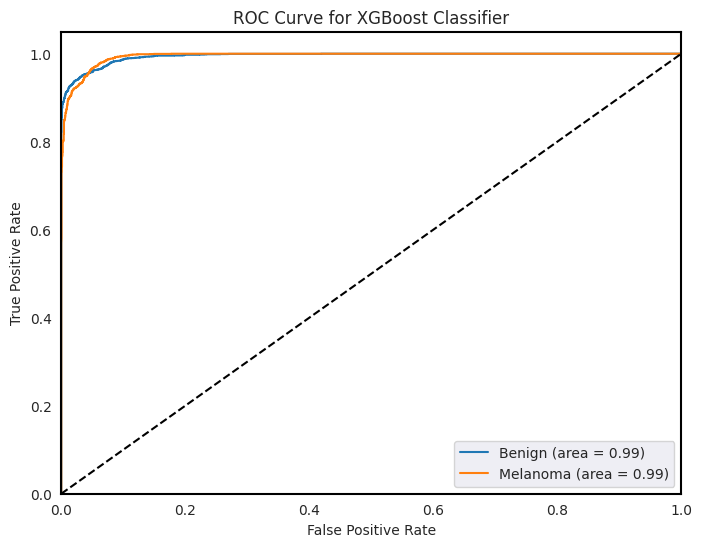

Kappa: 0.9153
MCC: 0.9153
Jaccard: 0.9188
Testing Loss: 0.1003


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, jaccard_score
import seaborn as sns
import numpy as np



# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred_xgb)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Classifier')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i][1] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i][1] for i in sorted(classes)])

# Highlight diagonal
for class_index in range(len(classes)):
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()


# Calculate ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use the probability estimates for the ROC curve
y_prob_xgb = xgb_classifier.predict_proba(X_test_features)

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_xgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


# Calculate kappa, MCC, Jaccard
kappa = cohen_kappa_score(y_test_int, y_pred_xgb)
mcc = matthews_corrcoef(y_test_int, y_pred_xgb)
jaccard = jaccard_score(y_test_int, y_pred_xgb, average='weighted')

# Print metrics
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")
print(f"Testing Loss: {test_loss:.4f}") # Assuming test_loss is defined

Training MLP classifier...
MLP classifier trained successfully.
Making predictions with MLP classifier...
MLP Accuracy: 0.9571045576407506
              precision    recall  f1-score   support

           e       0.96      0.95      0.96      2536
           e       0.95      0.96      0.96      2686

    accuracy                           0.96      5222
   macro avg       0.96      0.96      0.96      5222
weighted avg       0.96      0.96      0.96      5222



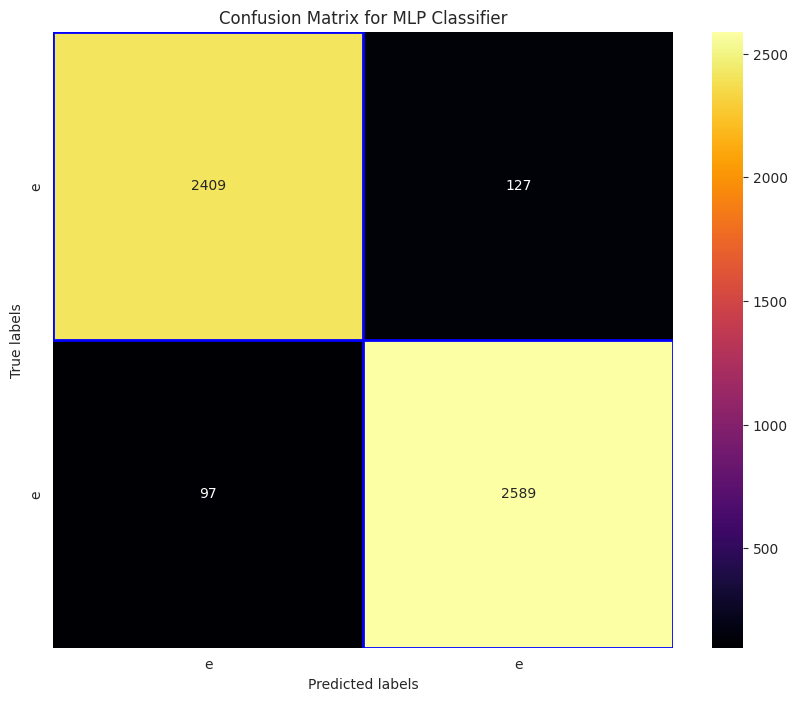

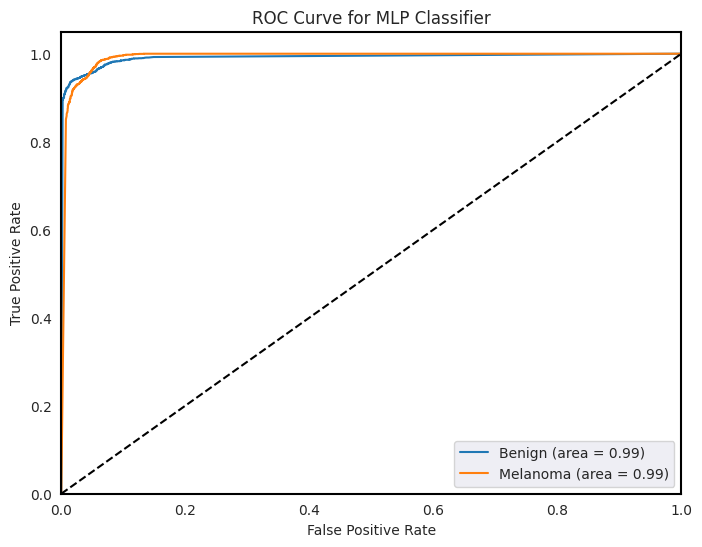

Making predictions with MLP classifier...
MLP Metrics (per class):
Accuracy: 0.957105
Precision: [0.9612929  0.95324006]
Recall: [0.94992114 0.96388682]
F1-Score: [0.95557319 0.95853388]
Log Loss: 0.2676


In [ ]:

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the classifier
print("Training MLP classifier...")
mlp_classifier.fit(X_train_features, y_train_int)
print("MLP classifier trained successfully.")

# Make predictions
print("Making predictions with MLP classifier...")
y_pred_mlp = mlp_classifier.predict(X_test_features)
y_prob_mlp = mlp_classifier.predict_proba(X_test_features)


# Evaluate the model
accuracy_mlp = accuracy_score(y_test_int, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")

# Generate classification report
print(classification_report(y_test_int, y_pred_mlp, target_names=[classes[i][1] for i in sorted(classes)]))

# Compute confusion matrix
cm = confusion_matrix(y_test_int, y_pred_mlp)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='inferno')

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for MLP Classifier')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i][1] for i in sorted(classes)])
ax.yaxis.set_ticklabels([classes[i][1] for i in sorted(classes)])

# Highlight diagonal
for class_index in range(len(classes)):
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

# Calculate ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_int, y_prob_mlp[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')  # Ensure figure background is white
ax.set_facecolor('white')  # Ensure axes background is white

# Add boundary box
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(1.5)      # Set border line width

# Iterate through class indices for plotting and use class names from the dictionary for labels
for class_index in classes.keys():
    ax.plot(fpr[class_index], tpr[class_index], label=f'{classes[class_index]} (area = {roc_auc[class_index]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc="lower right")
plt.show()

# Make predictions
print("Making predictions with MLP classifier...")
y_pred_mlp = mlp_classifier.predict(X_test_features)
y_prob_mlp = mlp_classifier.predict_proba(X_test_features)

# Calculate metrics
accuracy = accuracy_score(y_test_int, y_pred_mlp) # Changed y_test to y_test_int
precision = precision_score(y_test_int, y_pred_mlp, average=None) # Changed y_test to y_test_int
recall = recall_score(y_test_int, y_pred_mlp, average=None) # Changed y_test to y_test_int
f1 = f1_score(y_test_int, y_pred_mlp, average=None) # Changed y_test to y_test_int
loss = log_loss(y_test, y_prob_mlp)


print("MLP Metrics (per class):")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Log Loss: {loss:.4f}")

**GradCam**

In [ ]:
pip install tf-keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
cbam_model_for_gradcam=load_model('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_isic_cbam.keras')


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Assuming 'cbam_model_for_gradcam' is your loaded model and 'X_test' contains your test images.
# Also assuming you have the necessary imports (tf, keras, etc.) from your code.

# Define the layer name
last_conv_layer_name = "conv2d_7"  # Replace with the actual name of your last convolutional layer


# Create a model that outputs the activation of the last convolutional layer.
last_conv_layer_model = Model(inputs=cbam_model_for_gradcam.input, outputs=cbam_model_for_gradcam.get_layer(last_conv_layer_name).output)


def get_image_prediction(image_id):
  img_path = "/content/drive/MyDrive/Skin_ISIC_2018/skintest/Melanoma/"+ image_id + ".jpg"
  img = load_img(img_path, target_size=(28,28))
  img_array = img_to_array(img)/ 255.0
  img_array_expanded = np.expand_dims(img_array, axis=0)
  # Pass the image through the feature extraction layer to get the features
  img_features = feature_extraction_layer.predict(img_array_expanded)
  # Reshape is not needed here as feature_extraction_layer outputs the correct shape
  # img_features_flat = img_features.reshape(img_features.shape[0], -1)
  predicted_output = rf_classifier.predict(img_features)
  # The predicted_output is likely a 1D array of class predictions.
  #  We need to get the class prediction directly.
  class_predicted = predicted_output[0] # Get the class prediction directly
  return img_array, class_predicted

def model_modifier(model):
  # Remove the softmax layer for GradCAM.
  # In this code, the original model has a softmax layer.
  # Removing it allows the GradCAM implementation to make more sense.
  model.layers[-1].activation = None
  return model

def score_function(output):
  # Define the loss function (in this case, the output score of the predicted class)
  return output[0][np.argmax(output[0])]
  #return output[:, 1]


# Create Gradcam object
gradcam = Gradcam(cbam_model_for_gradcam, model_modifier, clone=False)


# The `score` argument is a function that takes a batch of images and returns a vector of the scores for each image.
# In this case, we're creating a function to select the class that the model predicts with the highest probability.
# We are using the predicted probabilities which are more informative than just the class prediction.





In [ ]:
import matplotlib.colors as mcolors
from PIL import Image

**Eta hobe na get_heatmap()**

In [ ]:
def get_heatmap(dx, image_id):
    img_array, class_predicted = get_image_prediction(image_id)
    heatmap = gradcam(score_function,
                      X=np.expand_dims(img_array, axis=0),
                      penultimate_layer=-1) # Assuming the last layer is the penultimate layer for gradcam
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(np.uint8(img_array), 0.5, heatmap, 0.5, 0)
    plt.imshow(superimposed_img)
    plt.title(f"GradCAM for {image_id} - Predicted Class: {class_predicted}")
    plt.show()

In [ ]:
import matplotlib.cm as cm  # Import the colormap module


**Use this instead**

In [ ]:
def get_heatmap(dx, image_id):
  img_array, class_predicted = get_image_prediction(image_id)
  class_abbr_predicted = classes[class_predicted][0]

  heatmap = gradcam(score_function,
                    img_array,
                    penultimate_layer=-1, # the last convolutional layer
                    )
  # Normalize and map the heatmap to RGB
  heatmap_normalized = np.uint8(255 * heatmap)

  # Apply a colormap (like jet) to the heatmap
  heatmap_colored = np.uint8(cm.jet(heatmap_normalized)[..., :3] * 255)

  # Remove the singleton dimensions (if your heatmap has extra dimensions)
  heatmap_colored = np.squeeze(heatmap_colored)

  # Ensure the heatmap is of the correct shape (height, width, channels)
  if heatmap_colored.ndim != 3:
    raise ValueError("Heatmap is not a 3D array of shape (height, width, channels)")

  # Convert the colored heatmap to an Image object
  heatmap_image = Image.fromarray(heatmap_colored)


  img_path = "/content/drive/MyDrive/Skin_ISIC_2018/skintest/Melanoma/"+ image_id + ".jpg"
  img = load_img(img_path, target_size=(224,224))
  img_array = img_to_array(img)

  # Resize the heatmap to match the original image size
  heatmap_resized = heatmap_image.resize(img_array.shape[:2], Image.Resampling.LANCZOS)

  # Convert the resized heatmap to a numpy array
  heatmap_resized = np.array(heatmap_resized)

  # Superimpose the heatmap onto the original image
  superimposed_img = heatmap_resized * 0.4 + img_array

  original_pil = Image.fromarray(img_array.astype('uint8'))
  superimposed_pil = Image.fromarray(superimposed_img.astype('uint8'))
  # Create a new figure for plotting
  plt.figure(figsize=(5, 5))




  # Plot the original image
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title(f'True class: {dx}', fontsize=12)
  plt.axis('off')

  # Plot the heatmap image
  plt.subplot(1, 2, 2)
  plt.imshow(superimposed_pil)
  plt.title(f'Predicted class: {class_abbr_predicted}', fontsize=12)
  plt.axis('off')

  # Adjust layout and display the plot
  plt.tight_layout()
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


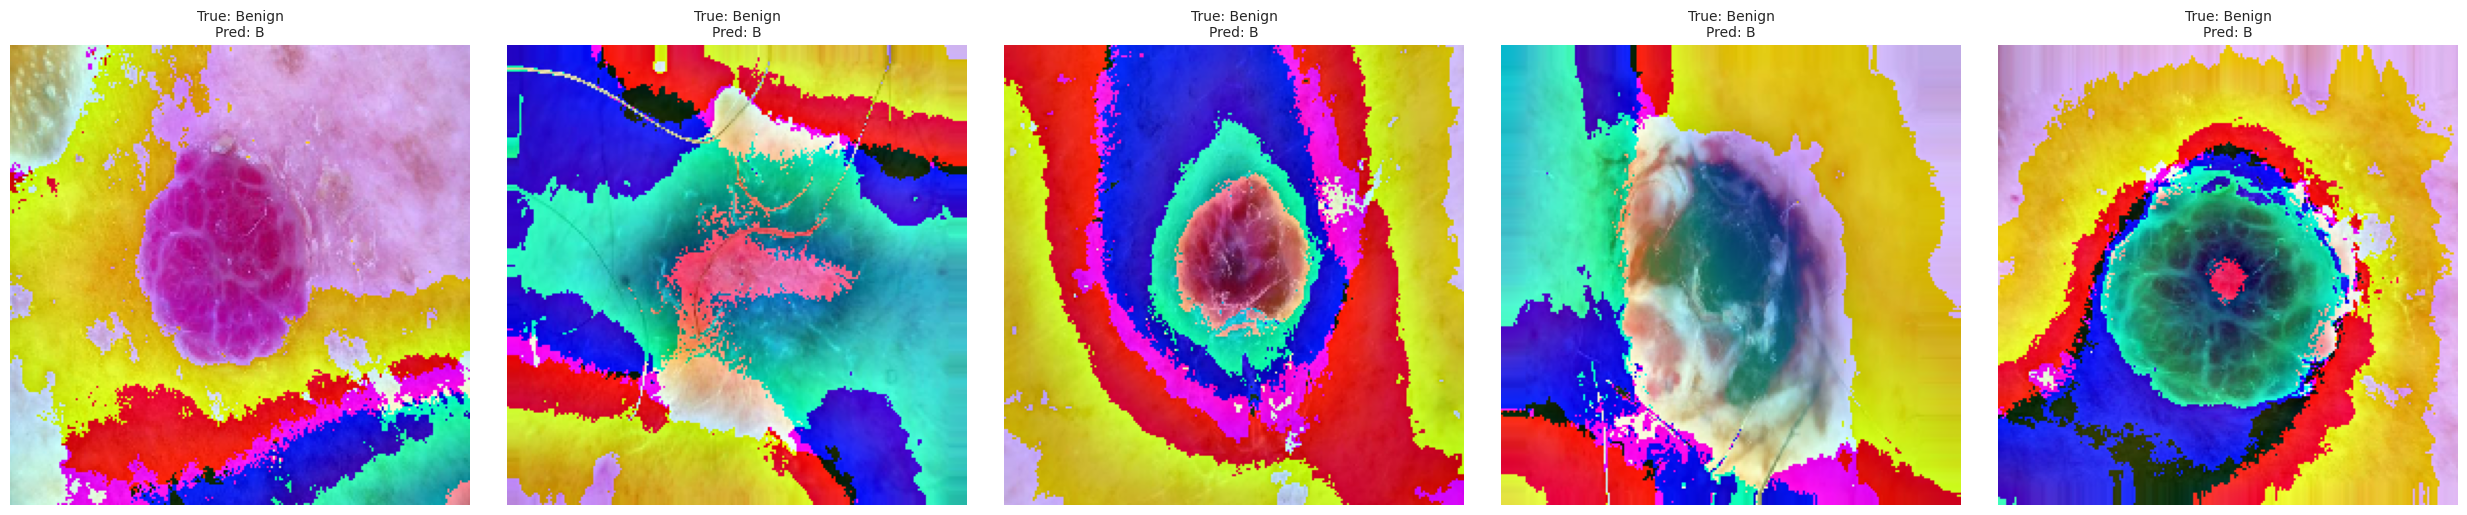

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from matplotlib import cm

def plot_images_with_heatmaps(dx_list, image_id_list):
    """Plots multiple images with their corresponding heatmaps in a row.

    Args:
      dx_list: A list of true diagnoses (strings).
      image_id_list: A list of image IDs (strings).
    """

    num_images = len(image_id_list)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))  # Adjust figsize

    for i, (dx, image_id) in enumerate(zip(dx_list, image_id_list)):
        try:
          img_array, class_predicted = get_image_prediction(image_id)
          class_abbr_predicted = classes[class_predicted][0]

          heatmap = gradcam(score_function,
                            img_array,
                            penultimate_layer=-1)

          heatmap_normalized = np.uint8(255 * heatmap)
          heatmap_colored = np.uint8(cm.jet(heatmap_normalized)[..., :3] * 255)
          heatmap_colored = np.squeeze(heatmap_colored)

          if heatmap_colored.ndim != 3:
              raise ValueError("Heatmap is not a 3D array of shape (height, width, channels)")

          heatmap_image = Image.fromarray(heatmap_colored)

          img_path = "/content/drive/MyDrive/Skin_ISIC_2018/skintest/Benign/"+ image_id + ".jpg"
          img = load_img(img_path, target_size=(224,224))
          img_array = img_to_array(img)

          heatmap_resized = heatmap_image.resize(img_array.shape[:2], Image.Resampling.LANCZOS)
          heatmap_resized = np.array(heatmap_resized)
          superimposed_img = heatmap_resized * 0.4 + img_array
          superimposed_pil = Image.fromarray(superimposed_img.astype('uint8'))

          axes[i].imshow(superimposed_pil)
          axes[i].set_title(f'True: {dx}\nPred: {class_abbr_predicted}', fontsize=10)
          axes[i].axis('off')

        except Exception as e:
          print(f"Error processing image {image_id}: {e}")
          axes[i].imshow(np.zeros((224,224,3))) # Display black image if error
          axes[i].set_title(f"Error: {image_id}")
          axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Example Usage
dx_values = ['Benign', 'Benign', 'Benign', 'Benign', 'Benign']
image_ids = ['ISIC_0032839_original', 'ISIC_0031827_aug_1', 'ISIC_0032076_aug_2', 'ISIC_0032775_aug_3', 'ISIC_0032932_aug_2'] # Example image IDs
plot_images_with_heatmaps(dx_values, image_ids)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


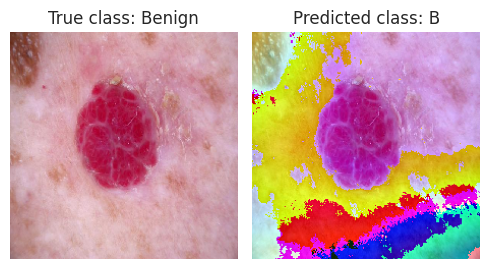

In [ ]:
dx = 'Benign'
image_id = 'ISIC_0032839_original'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


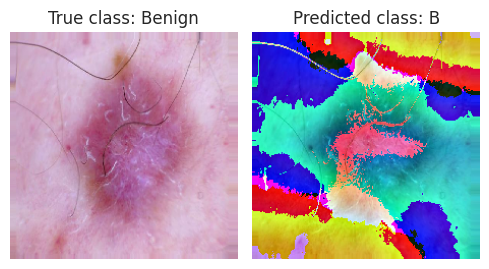

In [ ]:
dx = 'Benign'
image_id = 'ISIC_0031827_aug_1'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


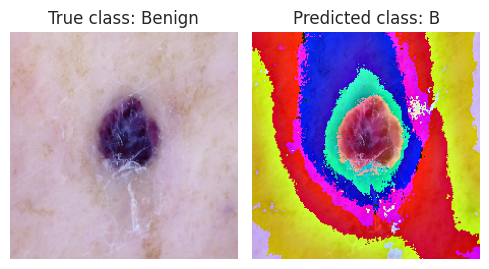

In [ ]:
dx = 'Benign'
image_id = 'ISIC_0032076_aug_2'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


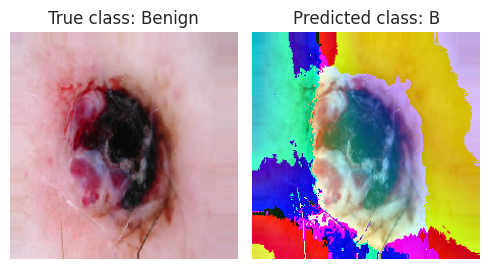

In [ ]:
dx = 'Benign'
image_id = 'ISIC_0032775_aug_3'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


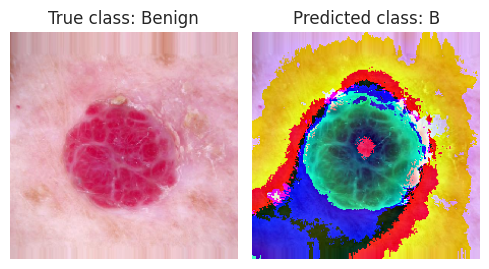

In [ ]:
dx = 'Benign'
image_id = 'ISIC_0032932_aug_2'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


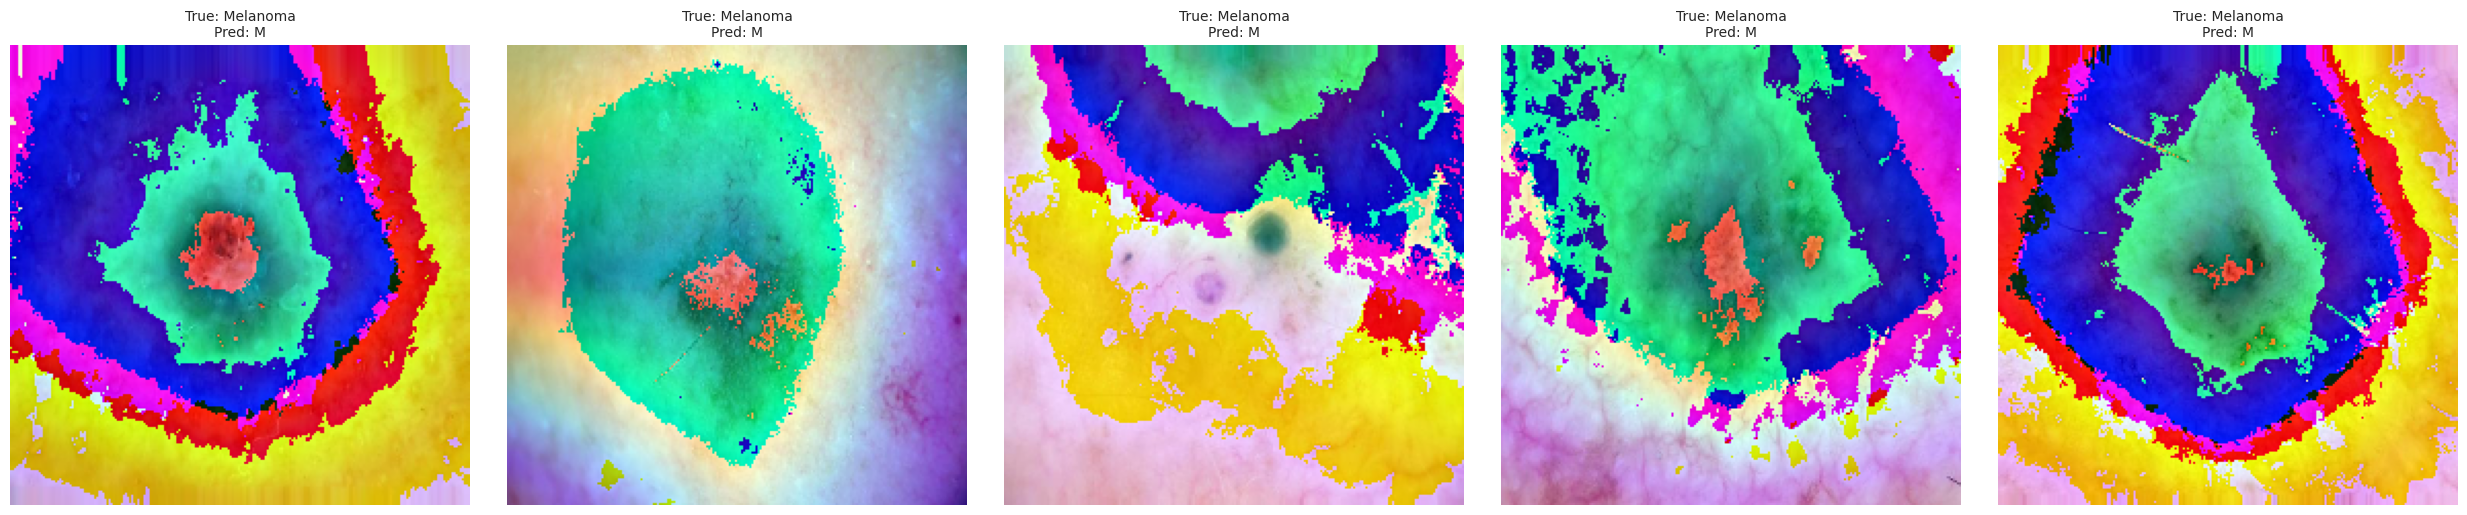

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from matplotlib import cm

def plot_images_with_heatmaps(dx_list, image_id_list):
    """Plots multiple images with their corresponding heatmaps in a row.

    Args:
      dx_list: A list of true diagnoses (strings).
      image_id_list: A list of image IDs (strings).
    """

    num_images = len(image_id_list)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))  # Adjust figsize

    for i, (dx, image_id) in enumerate(zip(dx_list, image_id_list)):
        try:
          img_array, class_predicted = get_image_prediction(image_id)
          class_abbr_predicted = classes[class_predicted][0]

          heatmap = gradcam(score_function,
                            img_array,
                            penultimate_layer=-1)

          heatmap_normalized = np.uint8(255 * heatmap)
          heatmap_colored = np.uint8(cm.jet(heatmap_normalized)[..., :3] * 255)
          heatmap_colored = np.squeeze(heatmap_colored)

          if heatmap_colored.ndim != 3:
              raise ValueError("Heatmap is not a 3D array of shape (height, width, channels)")

          heatmap_image = Image.fromarray(heatmap_colored)

          img_path = "/content/drive/MyDrive/Skin_ISIC_2018/skintest/Melanoma/"+ image_id + ".jpg"
          img = load_img(img_path, target_size=(224,224))
          img_array = img_to_array(img)

          heatmap_resized = heatmap_image.resize(img_array.shape[:2], Image.Resampling.LANCZOS)
          heatmap_resized = np.array(heatmap_resized)
          superimposed_img = heatmap_resized * 0.4 + img_array
          superimposed_pil = Image.fromarray(superimposed_img.astype('uint8'))

          axes[i].imshow(superimposed_pil)
          axes[i].set_title(f'True: {dx}\nPred: {class_abbr_predicted}', fontsize=10)
          axes[i].axis('off')

        except Exception as e:
          print(f"Error processing image {image_id}: {e}")
          axes[i].imshow(np.zeros((224,224,3))) # Display black image if error
          axes[i].set_title(f"Error: {image_id}")
          axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Example Usage
dx_values = ['Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma']
image_ids = ['ISIC_0028980_aug_2', 'ISIC_0033811_original', 'ISIC_0025509_aug_2', 'ISIC_0031407_original', 'ISIC_0031384_aug_2'] # Example image IDs
plot_images_with_heatmaps(dx_values, image_ids)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


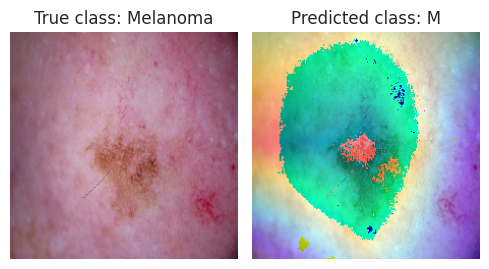

In [ ]:
dx = 'Melanoma'
image_id = 'ISIC_0033811_original'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


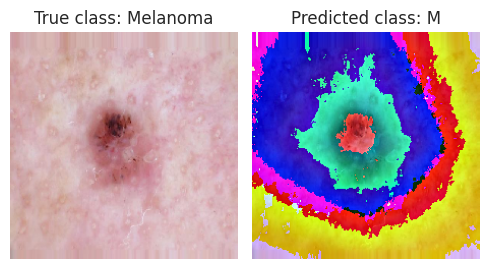

In [ ]:
dx = 'Melanoma'
image_id = 'ISIC_0028980_aug_2'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


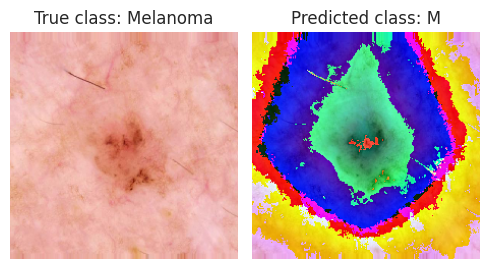

In [ ]:
dx = 'Melanoma'
image_id = 'ISIC_0031384_aug_2'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


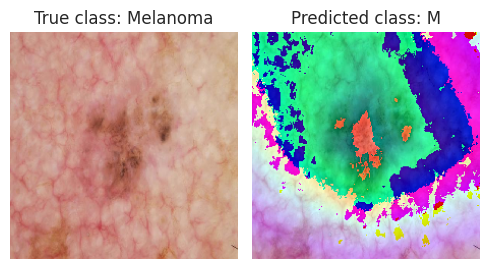

In [ ]:
dx = 'Melanoma'
image_id = 'ISIC_0031407_original'
get_heatmap(dx, image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


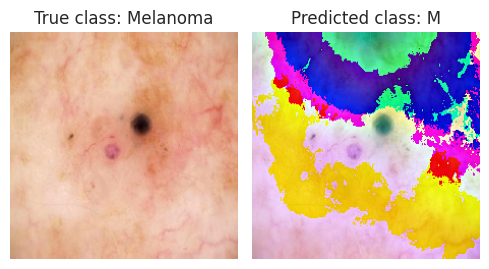

In [ ]:
dx = 'Melanoma'
image_id = 'ISIC_0025509_aug_2'
get_heatmap(dx, image_id)

**Testing**

In [ ]:
print([layer.name for layer in cbam_model_for_gradcam.layers if 'conv2d' in layer.name])


['conv2d_1', 'conv2d_2', 'conv2d_3', 'conv2d_4', 'conv2d_5', 'conv2d_6', 'conv2d_7']
